<a href="https://colab.research.google.com/github/anaghaburli21/Crop-Quality-extraction/blob/main/semproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 785.4837 - val_loss: 696.9926
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 718.4174 - val_loss: 618.6777
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 628.0192 - val_loss: 495.6192
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 486.8249 - val_loss: 328.0243
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 301.0842 - val_loss: 157.4964
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 134.1972 - val_loss: 53.2276
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.4251 - val_loss: 26.6156
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.8705 - val_loss: 23.2020
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.7869 - val_loss: 21.2569
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 17.0064 - val_loss: 19.7527
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16.2410 - val_loss: 18.5980
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7702 - loss: 0.8934 - val_accuracy: 0.9100 - val_loss: 0.5555
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9432 - loss: 0.4235 - val_accuracy: 0.9100 - val_loss: 0.3568
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.2387 - val_accuracy: 0.9100 - val_loss: 0.2799
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9466 - loss: 0.1818 - val_accuracy: 0.9100 - val_loss: 0.2243
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9461 - loss: 0.1480 - val_accuracy: 0.9100 - val_loss: 0.1931
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9445 - loss: 0.1341 - val_accuracy: 0.9100 - val_loss: 0.1688
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.1184 - val_accuracy: 0.9300 - val_loss: 0.1488
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9526 - loss: 0.1022 - val_accuracy: 0.9350 - val_loss: 0.1350
Ep

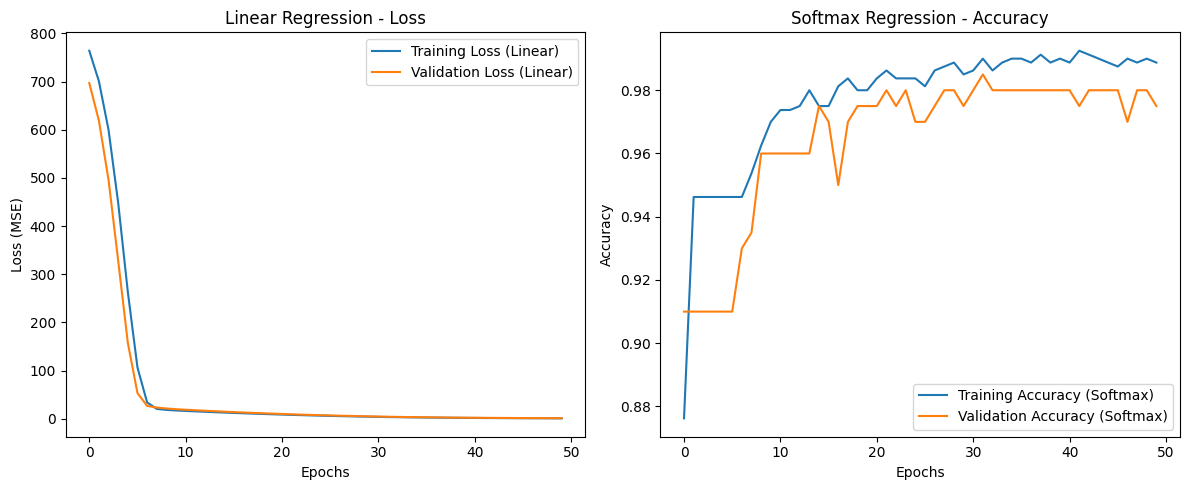

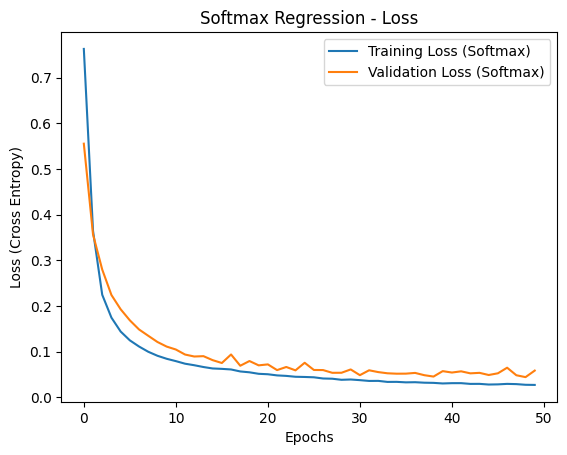

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

# Generate synthetic sample data
np.random.seed(42)
num_samples = 1000
temperature = np.random.uniform(20, 35, num_samples)
humidity = np.random.uniform(30, 80, num_samples)
disease_index = np.random.uniform(0, 1, num_samples)
quality_score = (0.4 * temperature) + (0.3 * humidity) - (0.2 * disease_index) + np.random.normal(0, 0.5, num_samples)
quality_class = np.where(quality_score > 20, 'high', np.where(quality_score > 15, 'medium', 'low'))

data = pd.DataFrame({
    'temperature': temperature,
    'humidity': humidity,
    'disease_index': disease_index,
    'quality_score': quality_score,
    'quality_class': quality_class
})

X = data[['temperature', 'humidity', 'disease_index']]
y_regression = data['quality_score']  # Target for Linear Regression
y_classification = data['quality_class']  # Target for Classification (Softmax)

encoder = LabelEncoder()
y_classification_encoded = encoder.fit_transform(y_classification)
y_classification_encoded = to_categorical(y_classification_encoded, num_classes=3)

X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_cls_train, y_cls_test = train_test_split(X, y_classification_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_cls = scaler.fit_transform(X_train_cls)
X_test_scaled_cls = scaler.transform(X_test_cls)

# -------------------
# LINEAR REGRESSION MODEL
# -------------------

linear_model = Sequential()
linear_model.add(Dense(64, input_dim=3, activation='relu'))
linear_model.add(Dense(32, activation='relu'))
linear_model.add(Dense(1))  # Output layer for regression

linear_model.compile(optimizer='adam', loss='mse')

# Train the model and track history
history_linear = linear_model.fit(X_train_scaled, y_reg_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_reg_test))

# -------------------
# SOFTMAX REGRESSION MODEL
# -------------------

softmax_model = Sequential()
softmax_model.add(Dense(64, input_dim=3, activation='relu'))
softmax_model.add(Dense(32, activation='relu'))
softmax_model.add(Dense(3, activation='softmax'))  # 3 classes

softmax_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and track history
history_softmax = softmax_model.fit(X_train_scaled_cls, y_cls_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled_cls, y_cls_test))

# -------------------
# VISUALIZE ACCURACY AND LOSS FOR BOTH MODELS
# -------------------

# Plot Loss for Linear Regression Model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_linear.history['loss'], label='Training Loss (Linear)')
plt.plot(history_linear.history['val_loss'], label='Validation Loss (Linear)')
plt.title('Linear Regression - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot Accuracy and Loss for Softmax Regression Model
plt.subplot(1, 2, 2)
plt.plot(history_softmax.history['accuracy'], label='Training Accuracy (Softmax)')
plt.plot(history_softmax.history['val_accuracy'], label='Validation Accuracy (Softmax)')
plt.title('Softmax Regression - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Loss for Softmax Regression Model separately
plt.figure()
plt.plot(history_softmax.history['loss'], label='Training Loss (Softmax)')
plt.plot(history_softmax.history['val_loss'], label='Validation Loss (Softmax)')
plt.title('Softmax Regression - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/test.zip'


Number of images loaded: 33
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5385 - loss: 1.0428 - val_accuracy: 0.1429 - val_loss: 17.0999
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step - accuracy: 0.5000 - loss: 10.0425 - val_accuracy: 0.1429 - val_loss: 5.1788
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 2.3686 - val_accuracy: 0.2857 - val_loss: 1.6661
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3462 - loss: 2.7029 - val_accuracy: 0.5714 - val_loss: 1.0078
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 0.2308 - loss: 2.5430 - val_accuracy: 0.7143 - val_loss: 0.9474
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step - accuracy: 0.3462 - loss: 1.8561 - val_accuracy: 0.2857 - val_loss: 1.0581
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4231 - loss: 1.2143 - val_accuracy: 0.2857 - val_loss: 1.2934
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3462 - loss: 0.9921 - val_accuracy: 0.2

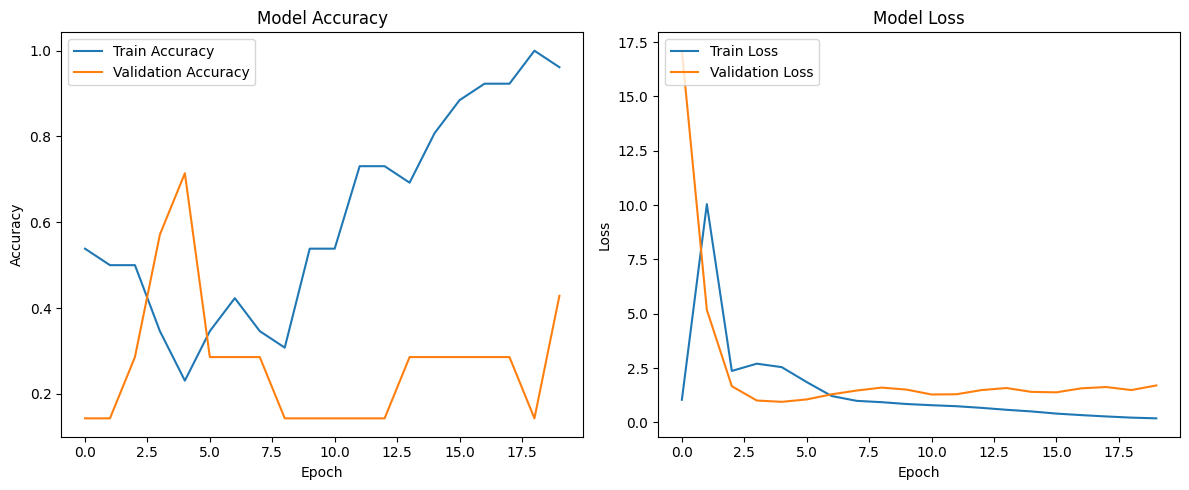

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Define the base directory where your images are stored
# Update this to your actual folder path
# It should point to the directory *containing* the image folders
base_dir = '/content/drive/MyDrive/test/test'  # Updated path to extracted folder


# Preprocess image function
def preprocess_image(img_path, img_size=(128, 128)):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image {img_path}. It may be an unsupported format or corrupted.")
        return None
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize the pixel values
    return img

# Load all images from the specified folder
def load_images_from_folder(folder):
    images = []
    image_names = []  # To keep track of image file names
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Include .jpeg
            img_path = os.path.join(folder, filename)
            img = preprocess_image(img_path)
            if img is not None:
                images.append(img)
                image_names.append(filename)  # Store the filename for later reference
            else:
                print(f"Error loading image {img_path}")
    return np.array(images), image_names

# Load images
images, image_names = load_images_from_folder(base_dir)

# Ensure images were loaded correctly
print(f"Number of images loaded: {len(images)}")

# Create a dummy label array for demonstration purposes
# You need to replace this with your actual labels
# For demonstration, let's assume you have three classes
labels = np.random.choice([0, 1, 2], size=len(images))  # Random labels for demonstration

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build a simple CNN model for classification
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))  # Specify input shape with Input layer
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Output for the number of quality classes
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
cnn_model = build_cnn_model((128, 128, 3))

# Train the model
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import zipfile
import os

# Define the directory to extract to
extraction_dir = '/content/drive/MyDrive/test'  # Change as needed

# Create the directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Extracted files to: {extraction_dir}")


Extracted files to: /content/drive/MyDrive/test


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#Fit the generator on your training data
datagen.fit(X_train)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(128, 128, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False  # Indent this line to be part of the for loop

# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Use ReduceLROnPlateau to reduce learning rate when a metric has
# stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3,
                                 verbose=1, factor=0.5)
# Train the model with the callback
history = model.fit(datagen.flow(X_train, y_train), epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_reduction])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5385 - loss: 1.0006 - val_accuracy: 0.5714 - val_loss: 0.8926 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3077 - loss: 1.6042 - val_accuracy: 0.1429 - val_loss: 2.9661 - learning_rate: 0.0010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 1.1466 - val_accuracy: 0.2857 - val_loss: 2.7799 - learning_rate: 0.0010
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6923 - loss: 0.8388
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6923 - loss: 0.8388 - val_accuracy: 0.1429 - val_loss: 2.6721 - learning_rate: 0.0010
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5769 - loss: 0.9941 - val_accuracy: 0.1429 - val_loss: 2.2557 - learning_rate: 5.0000e-04
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7692 - loss: 0.5960 - val_accuracy: 0.2857 - val_loss: 1.8312 -

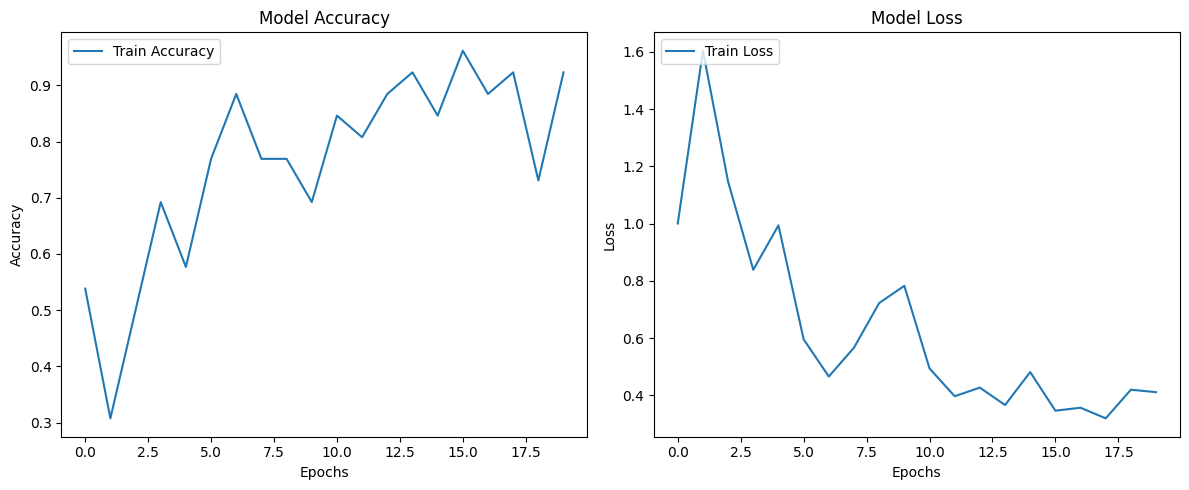

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3077 - loss: 1.6492 - val_accuracy: 0.1429 - val_loss: 7.3034 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5000 - loss: 4.0392 - val_accuracy: 0.1429 - val_loss: 5.6468 - learning_rate: 0.0010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 2.7537 - val_accuracy: 0.2857 - val_loss: 3.2900 - learning_rate: 0.0010
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4615 - loss: 1.3610 - val_accuracy: 0.2857 - val_loss: 1.9578 - learning_rate: 0.0010
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3462 - loss: 1.2140 - val_accuracy: 0.7143 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4231 - loss: 1.0119 - val_accuracy: 0.7143 - val_loss: 0.8450 - learning_rate: 0.0010
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4231 - loss: 1.0126 - val_accuracy: 0.1429 - val_lo

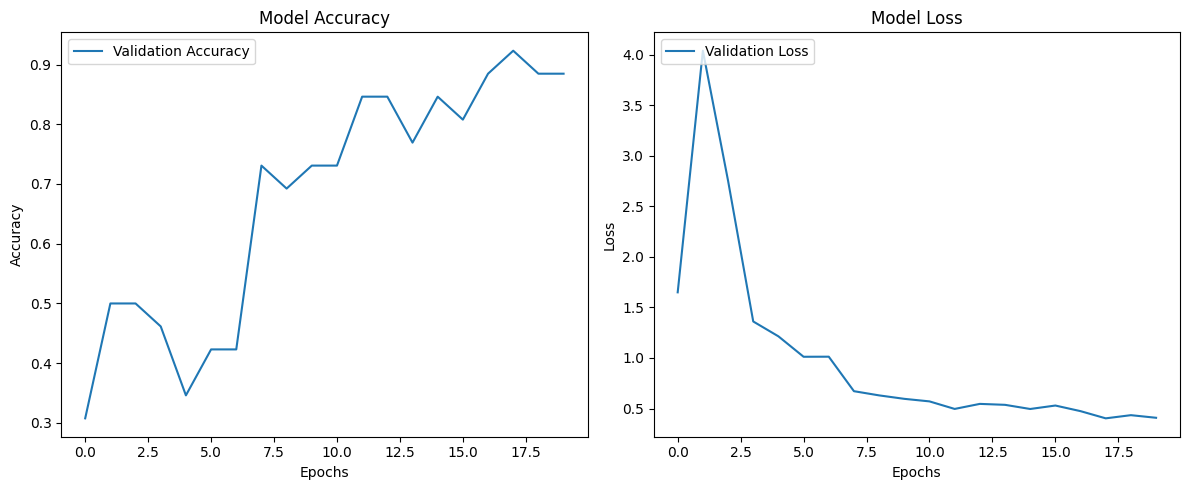

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Assume X_train, y_train, X_test, and y_test are already defined

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on your training data
datagen.fit(X_train)

# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Adjust the number of classes as needed

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use ReduceLROnPlateau to reduce learning rate when a metric has stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)

# Train the model with augmented data
history = model.fit(datagen.flow(X_train, y_train),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_reduction])

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.layers import Dropout
#Add Dropout layers in your model
x = Flatten()(base_model.output) # Removed extra indentation
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x) # Add dropout layer
predictions = Dense(3, activation='softmax')(x)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)

# Train the model with the callback
history = model.fit(datagen.flow(X_train, y_train),
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_reduction, early_stopping])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8846 - loss: 0.4625 - val_accuracy: 0.2857 - val_loss: 1.8929 - learning_rate: 3.1250e-05
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8846 - loss: 0.4548 - val_accuracy: 0.2857 - val_loss: 1.8719 - learning_rate: 3.1250e-05
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8462 - loss: 0.4295 - val_accuracy: 0.2857 - val_loss: 1.8517 - learning_rate: 3.1250e-05
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9231 - loss: 0.4059 - val_accuracy: 0.2857 - val_loss: 1.8311 - learning_rate: 3.1250e-05
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.8846 - loss: 0.4099 - val_accuracy: 0.2857 - val_loss: 1.8120 - learning_rate: 3.1250e-05
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.8846 - loss: 0.4246 - val_accuracy: 0.2857 - val_loss: 1.7917 - learning_rate: 3.1250e-05
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9615 - loss: 0.3545 - val_accur

In [ ]:
#Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-4:]: # Unfreeze the last 4 layers
    layer.trainable = True
#Re-compile the model after unfreezing layers
# Use learning_rate instead of lr
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Continue training
history_fine_tuning = model.fit(datagen.flow(X_train, y_train),
                                 epochs=20,
                                 validation_data=(X_test, y_test),
                                 callbacks=[lr_reduction, early_stopping])

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9231 - loss: 0.3784 - val_accuracy: 0.1429 - val_loss: 3.0789 - learning_rate: 1.0000e-04
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9615 - loss: 0.2901 - val_accuracy: 0.1429 - val_loss: 2.5449 - learning_rate: 1.0000e-04
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8846 - loss: 0.3139 - val_accuracy: 0.4286 - val_loss: 1.3157 - learning_rate: 1.0000e-04
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.8077 - loss: 0.4017 - val_accuracy: 0.1429 - val_loss: 2.0616 - learning_rate: 1.0000e-04
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.9615 - loss: 0.1613 - val_accuracy: 0.2857 - val_loss: 3.3805 - learning_rate: 1.0000e-04
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9231 - loss: 0.1958
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9231 - loss: 0.1958 - val_acc

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers on top for fine-tuning (optional if you have your own dataset)
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: good, medium, bad
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load weights if you have trained the model; otherwise, train the model with your dataset
# model.load_weights('path_to_your_trained_model_weights.h5')

# Define a function to evaluate image quality
def evaluate_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for EfficientNetB0

    # Get predictions
    preds = model.predict(img_array)
    return preds[0]  # Return raw predictions

# Define a function to classify quality based on predictions
def classify_quality(preds):
    # Assuming preds is an array of probabilities for 3 classes
    classes = ['Good', 'Medium', 'Bad']
    return classes[np.argmax(preds)]  # Return the class with the highest probability

# Path to the folder containing plant images
folder_path = '/content/drive/MyDrive/test/test/'  # Change this to your folder path

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Folder not found: {folder_path}")
else:
    # Lists to store results
    image_names = []
    qualities = []

    # Loop through images in the folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                preds = evaluate_image(img_path)
                quality = classify_quality(preds)
                image_names.append(img_name)
                qualities.append(quality)
                print(f"Processed: {img_name}, Quality: {quality}")
            except Exception as e:
                print(f"Error processing {img_name}: {e}")

    # Print the results line by line
    print("\nImage Name\t\tQuality Level")
    print("------------------------------------")
    for img_name, quality in zip(image_names, qualities):
        print(f"{img_name}\t\t{quality}")

    # Check if no images were processed
    if not image_names:
        print("No valid images found in the folder.")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Processed: AppleCedarRust1.JPG, Quality: Medium
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Processed: TomatoHealthy4.JPG, Quality: Bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Processed: TomatoYellowCurlVirus2.JPG, Quality: Medium
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Processed: AppleScab2.JPG, Quality: Bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Processed: AppleScab3.JPG, Quality: Medium
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Processed: AppleCedarRust3.JPG, Quality: Bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Processed: PotatoEarlyBlight5.JPG, Quality: Medium
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Processed: TomatoEarlyBlight1.JPG, Quality: Medium
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Processed: TomatoEarlyBlight4.JPG, Quality: Bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Processed: TomatoYellowCurlVirus1.JPG, Quality: Medium
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Processed: PotatoHealthy1.JPG, Quality: Bad
1/1 ━━━━